# Story - 4 : How much do we get paid?

I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "**How much do we get paid?**" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

Notes:

- You will need to identify reliable sources for salary data and assemble the data sets that you will need.
- Your visualization(s) must show the most salient information (variation in average salary by role and by state).
- For this Story you must use a code library and code that you have written in R, Python or Java Script (additional coding in other languages is allowed).
- Post generation enhancements to you generated visualization will be allowed (e.g. Addition of kickers and labels).
- This assignment is due at the end of the week eight of the semester.

Data was scraped from job listings on https://ai-jobs.net/ and supplemented with glassdoor job listings from a [Kaggle dataset](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor?select=salary_data_cleaned.csv).

In [776]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

scrape_df = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story4/jobs_scrape.csv')
glassdoor_df = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story4/glassdoor_jobs.csv')
states_df = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story4/state-abbr.csv')

scrape_df.head()

,job_title,location,salary_range,level,skills
0,Data Engineer,"Remote, United States",USD 100K - 130K,Mid-level,"Airflow, Architecture, AWS, Computer Science, ..."
1,Lead AI/ML Engineer,"Remote, Europe",NaN,Senior-level,"APIs, Architecture, Computer Science, Engineer..."
2,Founding AI Engineer,"San Francisco, CA",USD 120K - 180K,NaN,"Agile, Asana, AWS, Computer Vision, DevOps, GC..."
3,"Staff Research Scientist, AI/ML","Redwood City, CA",USD 270K - 405K,Mid-level,"Architecture, Biology, Computer Science, Data ..."
4,"Senior Machine Learning Engineer, Science","Redwood City, California",USD 190K - 285K,Mid-level,"Architecture, Biology, Computer Science, Data ..."


In [777]:
glassdoor_df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Merging Datasets

The goal of this assignment is to compare salaries across job roles/titles and states. The relevant columsn for the scraped job listings are `job_title`, `location`, and `salary_range`. The relevant columns from the glassdoor listings taken from Kaggle are `Job Title`, `Location`, and `Salary Estimate`. In order to combine these datasets, the columns titles will need to be the same so we will use the columns names from the scraped job dataset. 

In [778]:
# extract relevant columns
scrape_jobs_df = scrape_df[['job_title', 'location', 'salary_range']]
scrape_jobs_df = scrape_jobs_df.dropna()    # drop listings without salary info
scrape_jobs_df = scrape_jobs_df[scrape_jobs_df['salary_range'].str.contains('USD')]     # only keep listings in USD

glassdoor_jobs_df = pd.DataFrame({'job_title': glassdoor_df['Job Title'],
                                  'location': glassdoor_df['Location'],
                                  'salary_range': glassdoor_df['Salary Estimate']})

# merge dataframes
merged_jobs_df = pd.concat([scrape_jobs_df, glassdoor_jobs_df])
merged_jobs_df = merged_jobs_df[merged_jobs_df['salary_range'] != '-1']     # remove irregularity

merged_jobs_df['job_title'].str.replace('AI/ML Engineer', 'PLACEHOLDER')
merged_jobs_df['job_title'].str.replace('ML Engineer', 'Machine Learning Engineer')
merged_jobs_df['job_title'].str.replace('PLACEHOLDER', 'AI/ML Engineer')

merged_jobs_df.head()

,job_title,location,salary_range
0,Data Engineer,"Remote, United States",USD 100K - 130K
2,Founding AI Engineer,"San Francisco, CA",USD 120K - 180K
3,"Staff Research Scientist, AI/ML","Redwood City, CA",USD 270K - 405K
4,"Senior Machine Learning Engineer, Science","Redwood City, California",USD 190K - 285K
6,Senior Machine Learning Engineer,remote,USD 175K - 200K


### Salary vs. Job Role

Since there are many ways of stating the same roles, and some listings may have extra information in the job title, such as a specific department or company, let's filter based on the appearance of specific roles and create a columns of roles within the dataframe. 

In [779]:
# filter based on choice roles
roles = ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Machine Learning Researcher', 'Data Architect', 'Business Analyst', 'Business Intelligence Analyst', 'Business Intelligence Engineer', 'AI/ML Engineer', 'AI Scientist', 'Data Quality Analyst', 'AI Engineer']

filtered_jobs_df = merged_jobs_df[merged_jobs_df['job_title'].apply(lambda x: any(sub in x for sub in roles))].reset_index(drop=True)

job_roles = []
for title in filtered_jobs_df['job_title']:
    job_role = []
    for role in roles:
        if role in title:
            job_role.append(role)
    job_roles.append(', '.join(job_role))

# create role column
filtered_jobs_df['role'] = job_roles

filtered_jobs_df.head()

,job_title,location,salary_range,role
0,Data Engineer,"Remote, United States",USD 100K - 130K,Data Engineer
1,Founding AI Engineer,"San Francisco, CA",USD 120K - 180K,AI Engineer
2,"Senior Machine Learning Engineer, Science","Redwood City, California",USD 190K - 285K,Machine Learning Engineer
3,Senior Machine Learning Engineer,remote,USD 175K - 200K,Machine Learning Engineer
4,Staff Machine Learning Engineer (Tech Lead),Remote,USD 190K - 250K,Machine Learning Engineer


Now let's clean up and split the salary ranges and take the average salary for each listing. 

In [780]:
# split salary range into upper and lower
filtered_jobs_df['salary_range'] = filtered_jobs_df['salary_range'].apply(lambda x: re.sub('([USD \*$:]|\(.*\))', '', x)).str.replace('K', '000')
filtered_jobs_df['salary_range'] = filtered_jobs_df['salary_range'].apply(lambda x: re.sub('[A-Za-z]', '', x))

filtered_jobs_df[['salary_lower', 'salary_upper']] = filtered_jobs_df['salary_range'].str.split('-', expand=True)
filtered_jobs_df['salary_lower'] = filtered_jobs_df['salary_lower'].astype(int)
filtered_jobs_df['salary_upper'] = filtered_jobs_df['salary_upper'].fillna(0).astype(int)

filtered_jobs_df['avg_salary'] = filtered_jobs_df[['salary_lower', 'salary_upper']].mean(axis=1)

filtered_jobs_df.head()

,job_title,location,salary_range,role,salary_lower,salary_upper,avg_salary
0,Data Engineer,"Remote, United States",100000-130000,Data Engineer,100000,130000,115000.0
1,Founding AI Engineer,"San Francisco, CA",120000-180000,AI Engineer,120000,180000,150000.0
2,"Senior Machine Learning Engineer, Science","Redwood City, California",190000-285000,Machine Learning Engineer,190000,285000,237500.0
3,Senior Machine Learning Engineer,remote,175000-200000,Machine Learning Engineer,175000,200000,187500.0
4,Staff Machine Learning Engineer (Tech Lead),Remote,190000-250000,Machine Learning Engineer,190000,250000,220000.0


Now we can take the average salary for each role and graph.

In [781]:
# avg salary for each role
avg_salaries_role = pd.DataFrame(filtered_jobs_df[['role', 'avg_salary']].groupby('role').mean()).reset_index().sort_values('avg_salary')
avg_salaries_role

,role,avg_salary
3,Business Analyst,72000.000000
13,Data Quality Analyst,89875.000000
7,"Data Analyst, Business Analyst",90000.000000
6,Data Analyst,94077.233276
1,AI Scientist,103875.000000
9,"Data Architect, Business Intelligence Analyst",107500.000000
16,"Data Scientist, Data Analyst",111000.000000
15,"Data Scientist, Business Analyst",117500.000000
18,"Data Scientist, Machine Learning Engineer",123000.000000
4,Business Intelligence Analyst,128546.511628


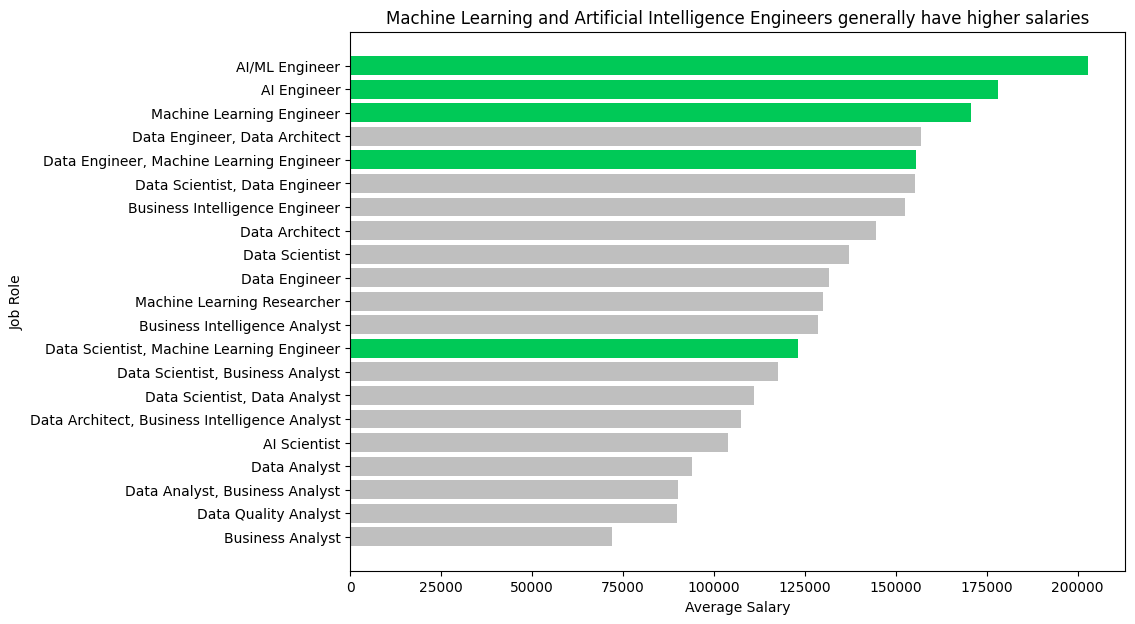

In [782]:
fig = plt.figure(figsize = (10,7))

colors = []
for role in avg_salaries_role['role']:
    if 'Machine Learning Engineer' in role or 'ML Engineer' in role or 'AI Engineer' in role:
        colors.append('#00C957')
    else:
        colors.append('#BFBFBF')
 
# creating the bar plot
plt.barh(avg_salaries_role['role'], avg_salaries_role['avg_salary'], color=colors)
 
plt.xlabel("Average Salary")
plt.ylabel("Job Role")
plt.title('Machine Learning and Artificial Intelligence Engineers generally have higher salaries')

plt.show()

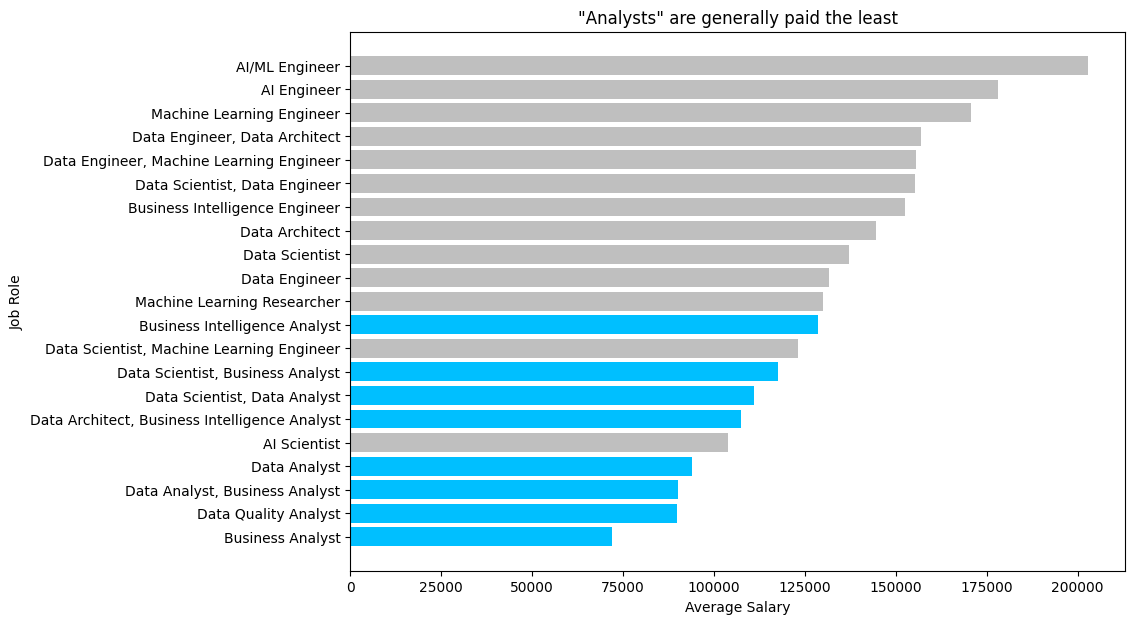

In [783]:
fig = plt.figure(figsize = (10,7))

colors = []
for role in avg_salaries_role['role']:
    if 'Analyst' in role:
        colors.append('#00BFFF')
    else:
        colors.append('#BFBFBF')
 
# creating the bar plot
plt.barh(avg_salaries_role['role'], avg_salaries_role['avg_salary'], color=colors)
 
plt.xlabel("Average Salary")
plt.ylabel("Job Role")
plt.title('"Analysts" are generally paid the least')
plt.show()

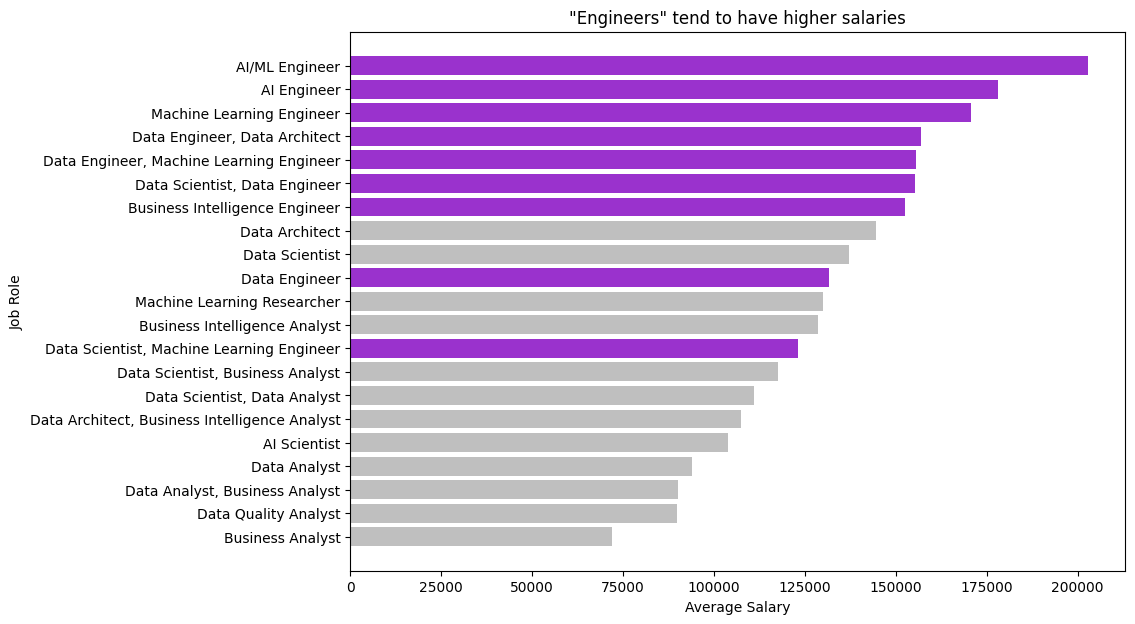

In [784]:
fig = plt.figure(figsize = (10,7))

colors = []
for role in avg_salaries_role['role']:
    if 'Engineer' in role:
        colors.append('#9A32CD')
    else:
        colors.append('#BFBFBF')
 
# creating the bar plot
plt.barh(avg_salaries_role['role'], avg_salaries_role['avg_salary'], color=colors)
 
plt.xlabel("Average Salary")
plt.ylabel("Job Role")
plt.title('"Engineers" tend to have higher salaries')
plt.show()

### Salary vs. State

For this, we need to extract the state information from each listing. Not all of these listings are in America or have a state listed so the data will need to be filtered. 

In [785]:
states_abbr = list(states_df['state']) + list(states_df['abbr'])

In [796]:
# filter for only US state jobs
states_jobs_df = merged_jobs_df.assign(location=merged_jobs_df['location'].str.split('; ')).explode('location')
states_jobs_df = states_jobs_df[states_jobs_df['location'].apply(lambda x: any(sub in x for sub in states_abbr))].reset_index(drop=True)

states_jobs_df

,job_title,location,salary_range
0,Founding AI Engineer,"San Francisco, CA",USD 120K - 180K
1,"Staff Research Scientist, AI/ML","Redwood City, CA",USD 270K - 405K
2,"Senior Machine Learning Engineer, Science","Redwood City, California",USD 190K - 285K
3,R_00029290 Lead Data Modeler – Remote,"Austin, TX",USD 130K - 155K
4,"Data Scientist, Python (Top Secret) - 1001","Denver, CO",USD 136K - 205K *
...,...,...,...
1777,"Sr Scientist, Immuno-Oncology - Oncology","Cambridge, MA",$58K-$111K (Glassdoor est.)
1778,Senior Data Engineer,"Nashville, TN",$72K-$133K (Glassdoor est.)
1779,"Project Scientist - Auton Lab, Robotics Institute","Pittsburgh, PA",$56K-$91K (Glassdoor est.)
1780,Data Science Manager,"Allentown, PA",$95K-$160K (Glassdoor est.)


In [797]:
states_jobs_df = filtered_jobs_df.assign(location=filtered_jobs_df['location'].str.split('; ')).explode('location')

def extract_state(location):
    for i in range(len(states_df)):
        abbr = ', ' + states_df['abbr'][i]
        if abbr in location:
            return states_df['abbr'][i]
        elif 'Washington, DC' in location or 'Washington, District of Columbia' in location:
            return 'DC'
        elif states_df['state'][i] in location:
            return states_df['abbr'][i]
        
states_jobs_df['state'] = states_jobs_df['location'].apply(lambda x: extract_state(x))
states_jobs_df = states_jobs_df[states_jobs_df['state'].isin(states_df['abbr'])]
states_jobs_df.head()

,job_title,location,salary_range,role,salary_lower,salary_upper,avg_salary,state
1,Founding AI Engineer,"San Francisco, CA",120000-180000,AI Engineer,120000,180000,150000.0,CA
2,"Senior Machine Learning Engineer, Science","Redwood City, California",190000-285000,Machine Learning Engineer,190000,285000,237500.0,CA
7,"Data Scientist, Python (Top Secret) - 1001","Denver, CO",136000-205000,Data Scientist,136000,205000,170500.0,CO
14,Senior Data Analyst,"Boston, MA, United States",92000-144000,Data Analyst,92000,144000,118000.0,MA
20,Sr. Machine Learning Engineer,"Salt Lake City, UT",150000-230000,Machine Learning Engineer,150000,230000,190000.0,UT


In [798]:
len(states_jobs_df)

1017

After filtering, we have 1,017 job postings remaining. 

In [799]:
avg_salaries_state = pd.DataFrame(states_jobs_df[['state', 'avg_salary']].groupby('state').mean()).reset_index().sort_values('avg_salary')
avg_salaries_state

,state,avg_salary
15,LA,63000.000000
25,NM,74333.333333
2,AZ,78555.555556
9,IA,78900.000000
10,ID,83000.000000
5,CT,84000.000000
14,KY,84000.000000
33,SC,88500.000000
29,OR,92125.000000
0,AL,93125.000000


In [790]:
import plotly.express as px

fig = px.choropleth(data_frame=avg_salaries_state, 
                    locations='state',
                    locationmode='USA-states',
                    color='avg_salary',
                    color_continuous_scale='Greens',
                    scope='usa')

fig.update_layout(
    title_text = 'Salaries by State',
)

fig.show()

Since there were only 33 states mentioned in the scraped job listings, the map here is kind of empty so the use of a choropleth is not the best way to visualize.

Let's use a bar graph instead to plot the top earning locations. Some states only appear in the dataset once which would severely skew the results if there is only one job listing with a high salary offer. For this reason, let's limit the scope to only states which appear in the dataset at least 10 times. 

In [800]:
# filter for states w at least 10 listings
state_counts = pd.DataFrame(states_jobs_df['state'].value_counts()).reset_index()
avg_salaries_state = pd.merge(avg_salaries_state, state_counts)
filtered_avg_salaries_state = avg_salaries_state[avg_salaries_state['count'] >= 10]

filtered_avg_salaries_state = filtered_avg_salaries_state.rename({'state':'abbr'}, axis=1)
filtered_avg_salaries_state = pd.merge(filtered_avg_salaries_state, states_df)

In [801]:
# states w at least 10 listings
filtered_avg_salaries_state

,abbr,avg_salary,count,state
0,TN,95501.687500,16,Tennessee
1,OH,100764.705882,17,Ohio
2,PA,103428.571429,21,Pennsylvania
3,NJ,104119.047619,21,New Jersey
4,MN,111500.000000,10,Minnesota
5,FL,112014.285714,35,Florida
6,IL,116420.454545,44,Illinois
7,VA,117871.951220,82,Virginia
8,UT,117875.000000,16,Utah
9,NC,118000.000000,17,North Carolina


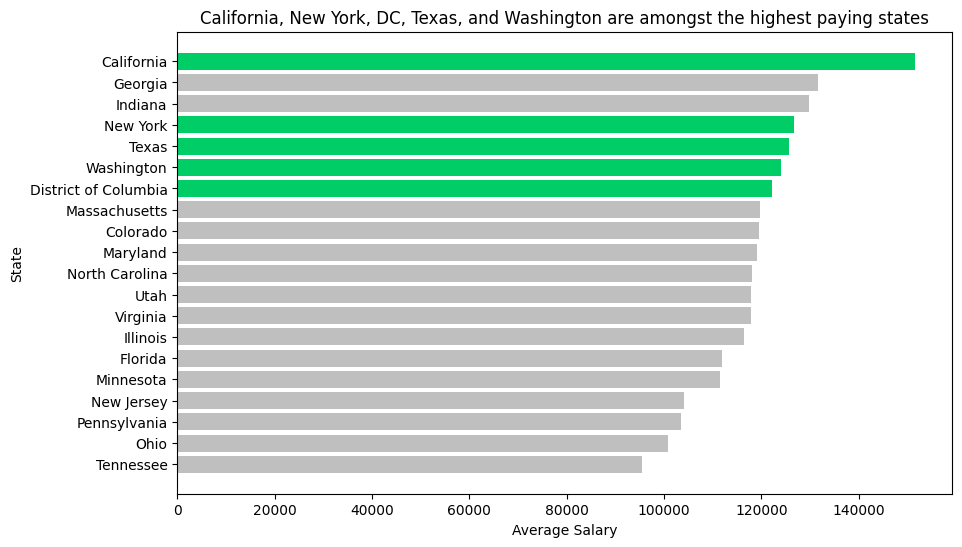

In [793]:
fig = plt.figure(figsize = (10, 6))

colors = []
for state in filtered_avg_salaries_state['state']:
    if state in ['California', 'New York', 'Texas', 'District of Columbia', 'Washington']:
        colors.append('#00CD66')
    else:
        colors.append('#BFBFBF')
 
# creating the bar plot
plt.barh(filtered_avg_salaries_state['state'], filtered_avg_salaries_state['avg_salary'], color=colors)
 
plt.xlabel("Average Salary")
plt.ylabel("State")
plt.title('California, New York, DC, Texas, and Washington are amongst the highest paying states')
plt.show()

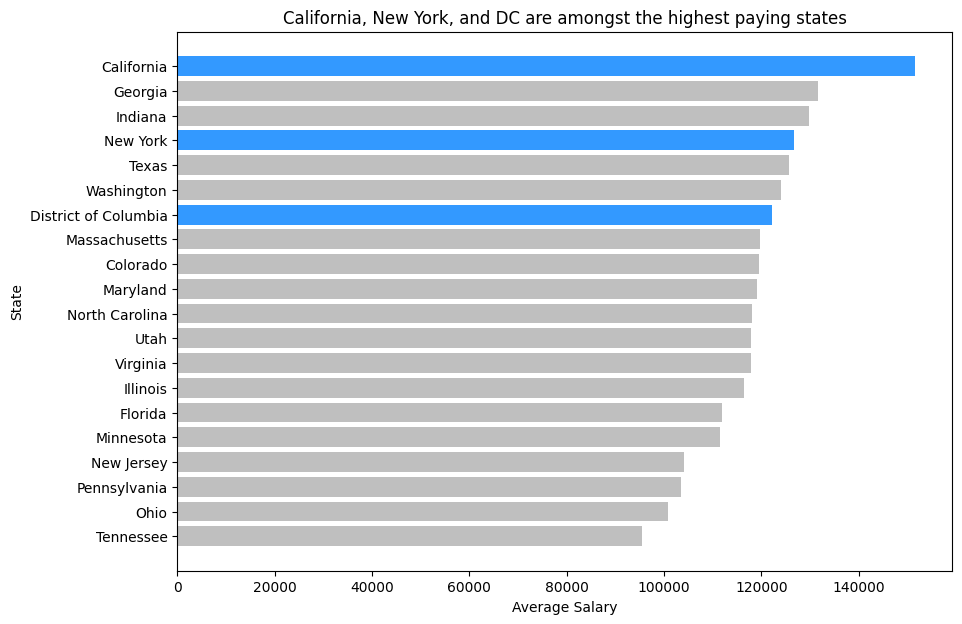

In [794]:
fig = plt.figure(figsize = (10, 7))

colors = []
for state in filtered_avg_salaries_state['state']:
    if state in ['California', 'New York', 'District of Columbia']:
        colors.append('#3399ff')
    else:
        colors.append('#BFBFBF')
 
# creating the bar plot
plt.barh(filtered_avg_salaries_state['state'], filtered_avg_salaries_state['avg_salary'], color=colors)
 
plt.xlabel("Average Salary")
plt.ylabel("State")
plt.title('California, New York, and DC are amongst the highest paying states')
plt.show()